In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
import sys
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(parent_dir)

from google import genai
from scripts.embedding_helpers import similarity

client = genai.Client(api_key=os.getenv("GEMINI_API_KEY"))

In [2]:
from scripts.helpers import get_only_generated_info, load_courses

courses, ctoi = load_courses("../data/formatted")
print(len(courses))
# courses_generated_info = get_only_generated_info(courses)

21106


In [3]:
print(courses[100])

{'CODE': ' LSP_TA_S ', 'FACULTY': ' CST ', 'NAME': ' LAP and LSP teacher assistant - Spanish ', 'LANGUAGE': ' španělština ', 'SEMESTER': ' podzim 2024 ', 'CREDITS': ' 2 ', 'DEPARTMENT': ' ', 'TEACHERS': ' Alchazidu, A. - De Azevedo Camacho, V. - Žváčková, J. - Holasová, M. ', 'COMPLETION': ' z ', 'PREREQUISITES': ' ', 'FIELDS_OF_STUDY': ' ', 'TYPE_OF_STUDY': ' ', 'LECTURES_SEMINARS_HOMEWORK': ' 0/2/0 ', 'SYLLABUS': ' ', 'OBJECTIVES': ' The course is intended for students who are native speakers of Spanish language and seek experience in language teaching. ', 'TEXT_PREREQUISITS': ' ', 'ASSESMENT_METHODS': ' ', 'TEACHING_METHODS': ' Students will be expected to cooperate with a Language Centre teacher on preparation as well as delivery of language classes for academic or specific purposes. Each of the students will be contacted by one Language Centre teacher. The teacher will be in charge of the course and responsible for its quality. S/he will guide the student in terms of language teac

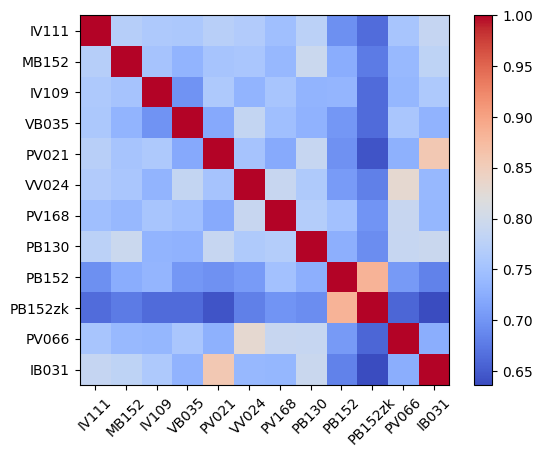

In [4]:
from scripts.helpers import edit_catalogue_for_llm, dict_print
from scripts.embedding_helpers import embed
import matplotlib.pyplot as plt
import numpy as np

sample_courses_names = ["IV111", "MB152", "IV109", "VB035", "PV021", "VV024", "PV168", "PB130", "PB152", "PB152zk", "PV066", "IB031"]
sample_courses_ids = [ctoi[name] for name in sample_courses_names]
samples_courses = [courses[i] for i in sample_courses_ids]

# for course in samples_courses:
#     print(dict_print(edit_catalogue_for_llm(course)))

sample_embeds = [embed(client.models, dict_print(edit_catalogue_for_llm(course))).embeddings[0].values for course in samples_courses]

# Plot similarities

similarity_matrix = np.zeros((len(samples_courses), len(samples_courses)))
for i in range(len(samples_courses)):
    for j in range(len(samples_courses)):
        similarity_matrix[i, j] = similarity(sample_embeds[i], sample_embeds[j])

plt.imshow(similarity_matrix, interpolation='nearest', cmap='coolwarm')
plt.xticks(range(len(samples_courses)), sample_courses_names, rotation=45)
plt.yticks(range(len(samples_courses)), sample_courses_names)
plt.colorbar()
plt.show()

In [5]:
all_embeds = []
print(len(courses))

21106


In [6]:
# import time
# from scripts.helpers import edit_catalogue_for_llm, dict_print

# for i, course in enumerate(courses):
#     if i < 13801:
#         continue
#     if i % 10 == 0:
#         print(i)
#     time.sleep(0.2)
#     all_embeds.append(embed(client.models, dict_print(edit_catalogue_for_llm(course))).embeddings[0].values)
#     if i % 100 == 0 and i != 0:
#         np.save(f"../data/embeddings/embeds{i}.npy", all_embeds)

In [20]:
# np.save(f"../data/embeddings/embeds21106.npy", all_embeds)
all_embeds = np.load(f"../data/embeddings/embeds_from_catalogue.npy", allow_pickle=True)

In [ ]:
from scripts.embedding_helpers import recommend_based_on_liked_disliked

course_names_pos = ["MA010", "IA159", "PV021", "PB156", "IB031", "PB016", "IV109", "IB107", "PB161"]
course_names_neg = ["PB007", "PV080"]

# find most similar courses
recommended_course_indices, simlarities = recommend_based_on_liked_disliked(course_names_pos, course_names_neg, all_embeds, ctoi, 30)
for i, sim in zip(recommended_course_indices, simlarities):
    print(sim, courses[i]["NAME"], courses[i]["CODE"])
    print("-------------------------------------------")

0.2245013  Introduction to Machine Learning   IB031 
-------------------------------------------
0.21206215  AI in Finance   MKF_AIIF 
-------------------------------------------
0.21108182  Biological Mathematics   CORE114 
-------------------------------------------
0.20870303  Graph Theory   M5140 
-------------------------------------------
0.20702031  Neural Networks   PV021 
-------------------------------------------
0.20661181  AI in Finance   MPF_AIIF 
-------------------------------------------
0.20401518  Mathematical foundations of the variational theories in physics   FB210 
-------------------------------------------
0.2034038  Contrastiv Linquistics II   NJDSJ4_13 
-------------------------------------------
0.20225613  Neurology - lecture   VLNE9X1p 
-------------------------------------------
0.20034333    MRFY0311p 
-------------------------------------------
0.19910775  Neurology - lecture   aVLNE9X1p 
-------------------------------------------
0.19865167  Using Cor